# Hacker Statistics
## Purpose
Use simulations to solve a problem involving randomness.

## Problem Narrative
Take a Random Walk up the Empire State Building. Use a 6-sided die to generate random moves. Rolls of 1 or 2 take you down one step. You go below zero. Rolls 3, 4, and 5 move you up one step. A roll of 6 gives you another roll and you always go up by that amount. Should you bet that you reach stair 60 of the Empire State Building if you start at the floor and have 100 rolls?

## Problem Specification

## Background Knowledge
Randomly generated numbers are pseudo-random because they can be reproduced from the same seed. This is a necessary tradeoff to ensure exact reproducability.

A random walk has many applications in modeling real world behavior:
* the path of a molecule through a liquid or gas
* a gambler's financial status

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generating Random Numbers

In [31]:
np.random.seed(123)

In [32]:
# random float between 0 and 1
np.random.rand()

0.6964691855978616

In [33]:
# random dice roll
np.random.randint(1,7)

3

## Simple Framework

In [34]:
# starting step
step = 50

In [35]:
# dice roll
dice = np.random.randint(1,7)

# next step
if dice <= 2 :
    step -= 1
elif dice in [3, 4, 5]:
    step += 1
else:
    step += np.random.randint(1,7)

print(dice, step)

5 51


## Random Walk

In [46]:
np.random.seed(123) # comment to test different random rolls

# step history
random_walk = [0]

for x in range(100):
    # use last position
    step = random_walk[-1]
    
    dice = np.random.randint(1,7)
    
    if dice <= 2:
        step -= 1
    elif dice <= 5:
        step += 1
    else:
        step += np.random.randint(1,7)

    # add next step to random_walk
    random_walk.append(step)

print(random_walk)

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, -1, 0, 5, 4, 3, 4, 3, 4, 5, 6, 7, 8, 7, 8, 7, 8, 9, 10, 11, 10, 14, 15, 14, 15, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 32, 33, 37, 38, 37, 38, 39, 38, 39, 40, 42, 43, 44, 43, 42, 43, 44, 43, 42, 43, 44, 46, 45, 44, 45, 44, 45, 46, 47, 49, 48, 49, 50, 51, 52, 53, 52, 51, 52, 51, 52, 53, 52, 55, 56, 57, 58, 57, 58, 59]


## Random Walk With Constraints

In [48]:
np.random.seed(123) # comment to test different random rolls

random_walk = [0]

for x in range(100):
    step = random_walk[-1]
    
    dice = np.random.randint(1,7)
    
    if dice <= 2:
        step = max(0, step - 1)
    elif dice <= 5:
        step += 1
    else:
        step += np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60]


## Visualize the Walk

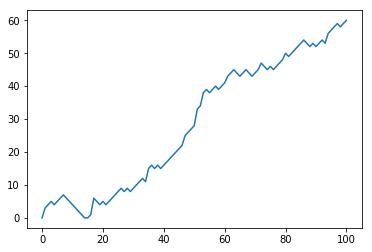

In [51]:
plt.plot(random_walk)
plt.show()

## Multiple Random Walks

Let's build a distribution so that we can evaluate the probability of reaching the 60 step threshold.

In [53]:
np.random.seed(123) # comment to test different random rolls

all_walks = []

# simulate 10 walks
for walk in range(10):
    random_walk = [0]

    for x in range(100):
        step = random_walk[-1]

        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step += 1
        else:
            step += np.random.randint(1,7)

        random_walk.append(step)
    
    # add each random walk to the previous random walks
    all_walks.append(random_walk)

print(all_walks)

[[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60], [0, 4, 3, 2, 4, 3, 4, 6, 7, 8, 13, 12, 13, 14, 15, 16, 17, 16, 21, 22, 23, 24, 23, 22, 21, 20, 19, 20, 21, 22, 28, 27, 26, 25, 26, 27, 28, 27, 28, 29, 28, 33, 34, 33, 32, 31, 30, 31, 30, 29, 31, 32, 35, 36, 38, 39, 40, 41, 40, 39, 40, 41, 42, 43, 42, 43, 44, 45, 48, 49, 50, 49, 50, 49, 50, 51, 52, 56, 55, 54, 55, 56, 57, 56, 57, 56, 57, 59, 64, 63, 64, 65, 66, 67, 68, 69, 68, 69, 70, 71, 73], [0, 2, 1, 2, 3, 6, 5, 6, 5, 6, 7, 8, 7, 8, 7, 8, 9, 11, 10, 9, 10, 11, 10, 12, 13, 14, 15, 16, 17, 18, 17, 18, 19, 24, 25, 24, 23, 22, 21, 22, 23, 24, 29, 30, 29, 30, 31, 32, 33, 34, 35, 34, 33, 34, 33, 39, 38, 39, 38, 39, 38, 3

## Visualize the Walks

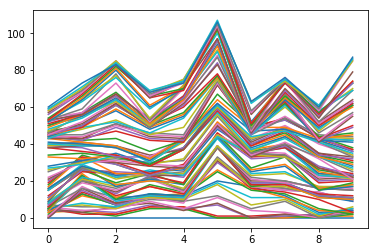

In [54]:
np_aw = np.array(all_walks)

plt.plot(np_aw)
plt.show()

In [ ]:
# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()